In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from statistics import mean
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from kneed import KneeLocator

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import normalize

from sklearn.preprocessing import OneHotEncoder


%matplotlib inline

In [2]:
df = pd.read_csv('marketing_campaign.csv',delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- distribution of data

(array([217., 716., 721., 514.,  39.,   1.,   1.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1730.        ,  23894.53333333,  46059.06666667,  68223.6       ,
         90388.13333333, 112552.66666667, 134717.2       , 156881.73333333,
        179046.26666667, 201210.8       , 223375.33333333, 245539.86666667,
        267704.4       , 289868.93333333, 312033.46666667, 334198.        ,
        356362.53333333, 378527.06666667, 400691.6       , 422856.13333333,
        445020.66666667, 467185.2       , 489349.73333333, 511514.26666667,
        533678.8       , 555843.33333333, 578007.86666667, 600172.4       ,
        622336.93333333, 644501.46666667, 666666.        ]),
 <a list of 30 Patch objects>)

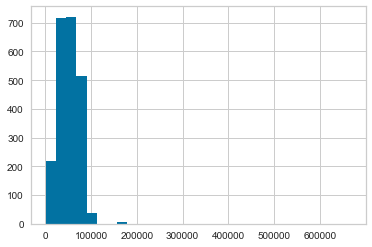

In [5]:
plt.hist(df['Income'],bins=30)

## Data Preprocessing

- drop unused column \ feature

In [6]:
df.drop('ID', inplace=True, axis=1)

In [7]:
# df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.drop('Dt_Customer', axis=1, inplace=True)

- replace Null values

In [8]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [9]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

- encoding categorical features

In [10]:
encoding = OneHotEncoder().fit_transform(df[['Education','Marital_Status']]).toarray()
 
encoded_df = pd.DataFrame(encoding)

df = df.join(encoded_df)
df.drop('Education', axis=1, inplace=True)
df.drop('Marital_Status', axis=1, inplace=True)
df


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,3,4,5,6,7,8,9,10,11,12
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- Normalize data

In [11]:
df_normalized = pd.DataFrame(normalize(df))
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.033638,0.999322,0.000000,0.000000,0.000997,0.010915,0.001513,0.009385,0.002956,0.001513,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000017,0.000000,0.0,0.0
1,0.042126,0.999112,0.000022,0.000022,0.000819,0.000237,0.000022,0.000129,0.000043,0.000022,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000022,0.000000,0.0,0.0
2,0.027428,0.999603,0.000000,0.000000,0.000363,0.005946,0.000684,0.001773,0.001549,0.000293,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000014,0.0,0.0
3,0.074252,0.997238,0.000037,0.000000,0.000973,0.000412,0.000150,0.000749,0.000374,0.000112,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000037,0.0,0.0
4,0.033964,0.999415,0.000017,0.000000,0.001612,0.002966,0.000737,0.002023,0.000789,0.000463,...,0.0,0.000017,0.0,0.0,0.0,0.000017,0.000000,0.000000,0.0,0.0


In [12]:
def choose_k(df_normalized):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(df_normalized)        
    visualizer.show()

In [13]:
def Kmeans(df_normalized,k):
    kmeans = KMeans(k)
    kmeans.fit(df_normalized)
    df_normalized["kmeans"] = kmeans.labels_
    score_KMeans = silhouette_score(df_normalized, df_normalized["kmeans"], metric='euclidean')
    return score_KMeans

In [14]:
def choose_component(df_normalized,component):
    pca = PCA(n_components=component)
    PCA_transform = pca.fit_transform(df_normalized)
    PCA_df = pd.DataFrame(data = PCA_transform)
    return PCA_df



### 1) KMeans without PCA

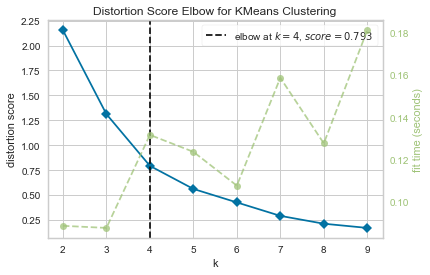

In [15]:
choose_k(df_normalized)

In [16]:
score_KMeans = Kmeans(df_normalized,4)
print(f"KMeans cluster score : {score_KMeans}")

KMeans cluster score : 0.9822170357618379


### 2) KMeans with PCA

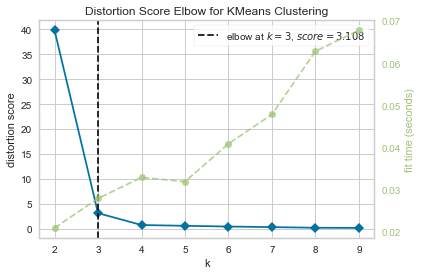

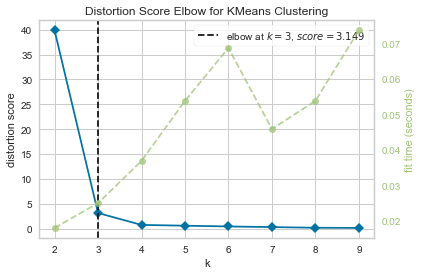

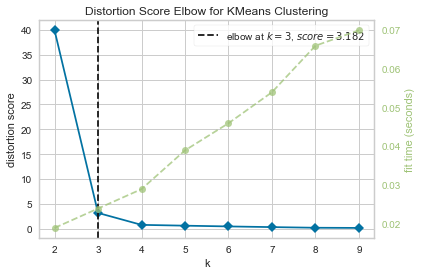

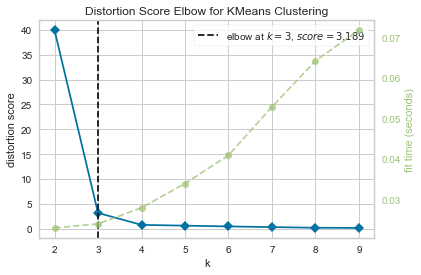

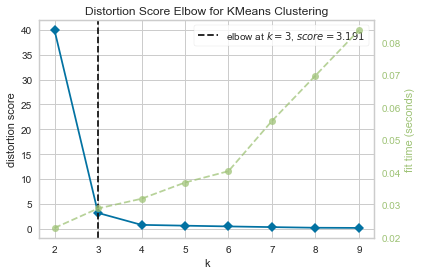

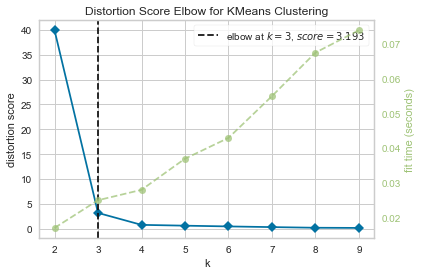

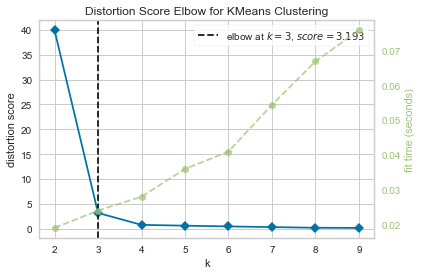

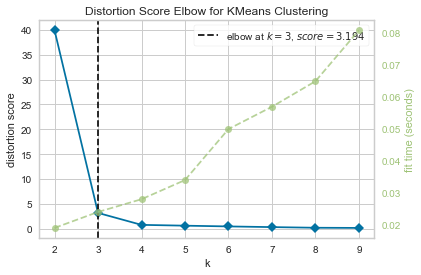

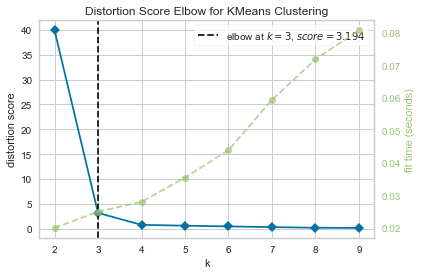

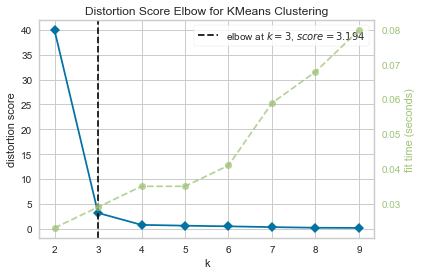

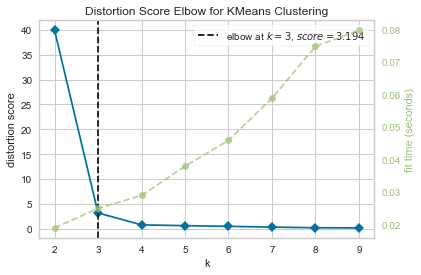

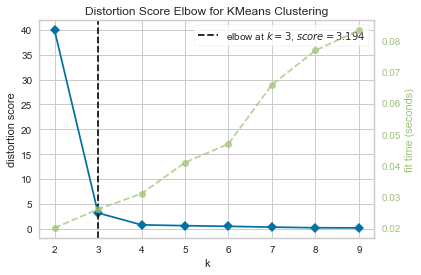

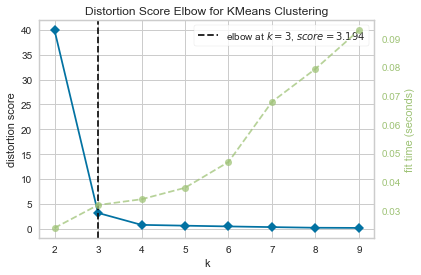

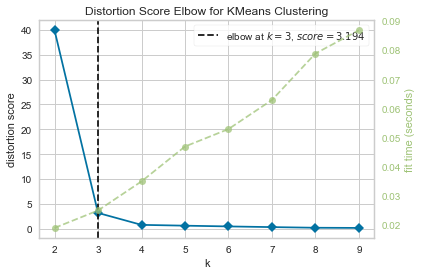

In [17]:
KMeans_Scores = []
for i in range(3,17):
    PCA_df = choose_component(df_normalized,i)
    choose_k(PCA_df)
    score_KMeans = Kmeans(PCA_df,4)
    KMeans_Scores.append(score_KMeans)


In [18]:
KMeans_Scores

[0.9886463172982567,
 0.9881588925577895,
 0.9876160268041579,
 0.9875398873028368,
 0.9874896161689772,
 0.9874481327483019,
 0.9873932998716157,
 0.987422801043107,
 0.9874225306142657,
 0.9874223504658253,
 0.9874221831014109,
 0.9874220898837294,
 0.987422028588578,
 0.9874220115903131]

---------------------------------------------------------
### 3) hirarecal without PCA

In [19]:
def choose_k_hirarecal(df_normalized):
    model = AgglomerativeClustering()
    visualizer = KElbowVisualizer(model, k=(2,10))
    visualizer.fit(df_normalized)        
    visualizer.show()

In [20]:
def hirarecal(df_normalized,k):
    hac = AgglomerativeClustering(k)
    hac.fit(df_normalized)
    df_normalized["hac"] = hac.labels_
    score_hac = silhouette_score(df_normalized, df_normalized["hac"], metric='euclidean')
    return score_hac

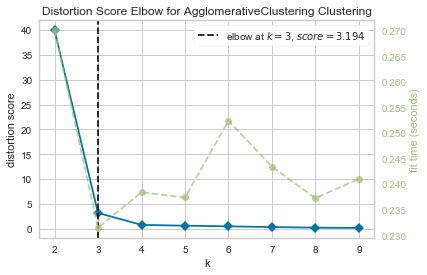

In [21]:
choose_k_hirarecal(df_normalized)

In [22]:
score_hirarecal = hirarecal(df_normalized,4)
score_hirarecal

0.9874219254689357


### 4) hirarecal with PCA

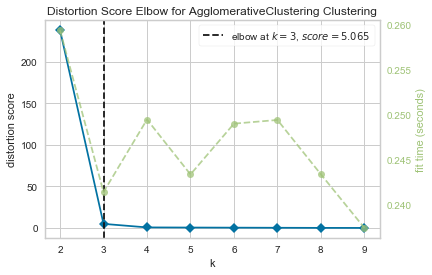

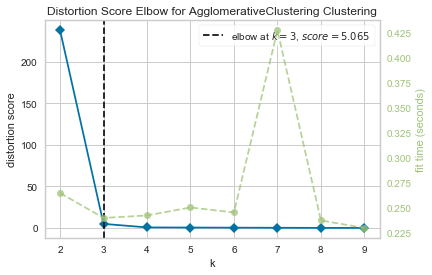

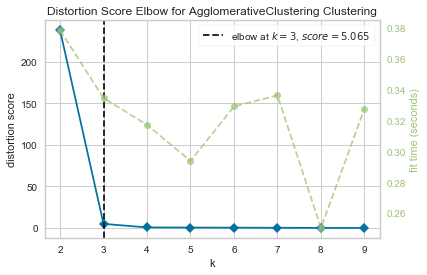

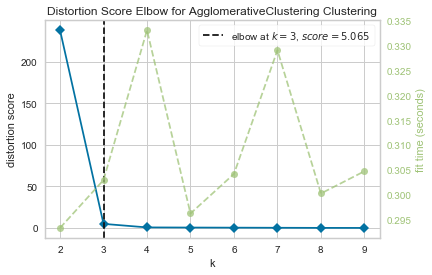

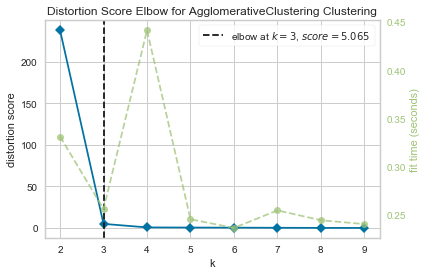

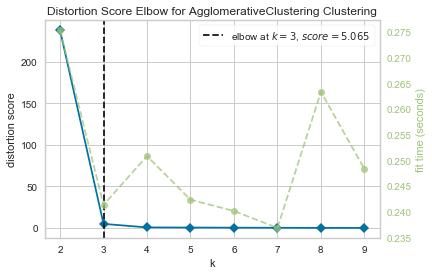

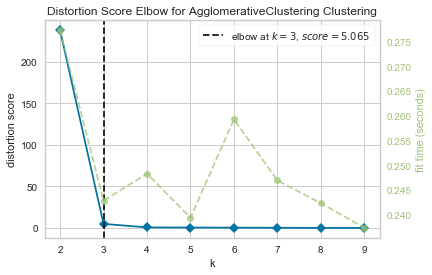

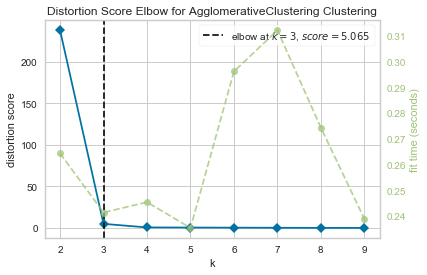

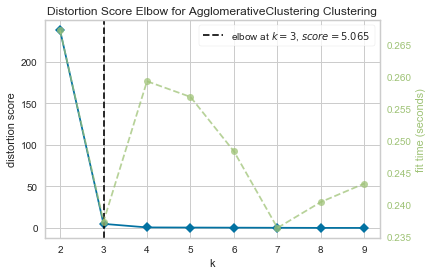

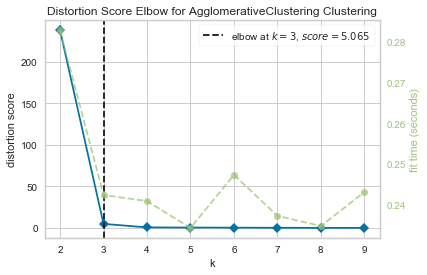

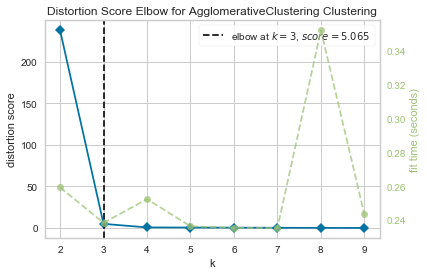

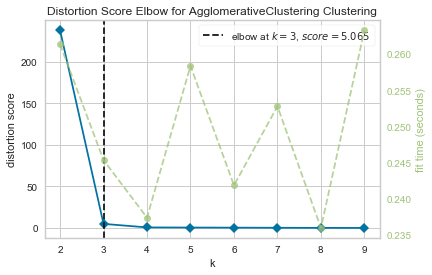

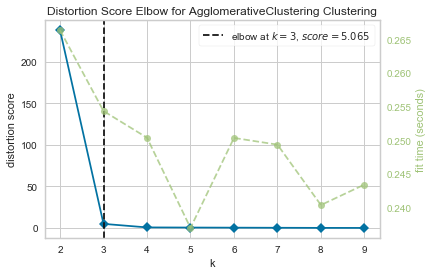

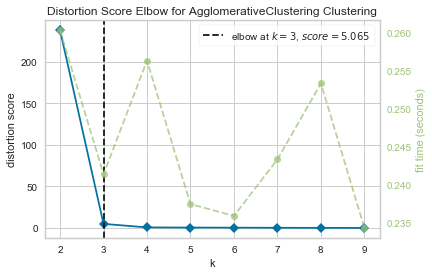

In [23]:
hirarecal_score=[]
for i in range(3,17):
    PCA_df = choose_component(df_normalized,i)
    choose_k_hirarecal(df_normalized)
    score_hirarecal = hirarecal(PCA_df,3)
    hirarecal_score.append(score_hirarecal)
    

In [24]:
hirarecal_score

[0.9914071828029883,
 0.9904325921144901,
 0.9898431467897926,
 0.9895633608911388,
 0.9895112148213067,
 0.9894720899605147,
 0.9894396330568765,
 0.9894282551631065,
 0.9894191865004526,
 0.9894190026785967,
 0.9894188791851958,
 0.9894187488495013,
 0.9894186744181115,
 0.9894186253646812]

------------------------------------
### 5) DBSCAN without PCA

In [25]:
def choose_epsilon(df_normalized):
    nearest_neighbors = NearestNeighbors(n_neighbors=11)
    neighbors = nearest_neighbors.fit(df_normalized)
    distances, indices = neighbors.kneighbors(df_normalized)
    distances = np.sort(distances[:,10], axis=0)
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    return(distances[knee.knee])
    

In [26]:
def DBScan(df_normalized,epsilon,min_sample):
    clustering = DBSCAN(eps=epsilon, min_samples=min_sample).fit(df_normalized)
    df_normalized["dbs"] = clustering.labels_
    df_normalized["dbs"].unique()
    labels =df_normalized["dbs"]
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    score_DBSCAN = silhouette_score(df_normalized, df_normalized["dbs"], metric='euclidean')
    return n_clusters , n_noise , score_DBSCAN
   

In [27]:
epsilon = choose_epsilon(df_normalized)
n_clusters , n_noise , score_DBSCAN = DBScan(df_normalized,epsilon,10)
print(f"number of clusters {n_clusters}")
print(f"number of noise {n_noise}")
print(f"DBSCAN cluster score : {score_DBSCAN}")

number of clusters 4
number of noise 99
DBSCAN cluster score : 0.9480617816862638


### 6) DBSCAN with PCA

In [28]:
no_cluster = []
no_noise = []
DBSCAN_Scores = []

In [29]:
for i in range(3,17):
    PCA_df = choose_component(df_normalized,i)
    epsilon = choose_epsilon(PCA_df)
    n_clusters , n_noise , score_DBSCAN = DBScan(PCA_df,epsilon,10)
    no_cluster.append(n_clusters)
    no_noise.append(n_noise)
    DBSCAN_Scores.append(score_DBSCAN)

In [30]:
no_cluster


[5, 4, 6, 6, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4]

In [31]:
no_noise


[177, 192, 120, 107, 111, 102, 113, 103, 99, 99, 99, 99, 99, 99]

In [32]:
# list(np.around(np.array(DBSCAN_Scores),3))
DBSCAN_Scores

[0.9255276868121539,
 0.9161279851087999,
 0.9416836406645388,
 0.9500573096528656,
 0.9472739022263384,
 0.9530630885705486,
 0.946895785107161,
 0.9534086857174119,
 0.9564654175244404,
 0.9564578520286188,
 0.9564576935769107,
 0.9564575804903211,
 0.9564574610957294,
 0.9564573907756873]

-----------------------------------
### 7) Gaussian without PCA

In [33]:
def Gaussian(df_normalized,k):
    gm = GaussianMixture(k)
    gm.fit(df_normalized)
    df_normalized["gm"] = gm.predict(df_normalized)
    score_Gaussian = silhouette_score(df_normalized, df_normalized["gm"], metric='euclidean')
    return score_Gaussian


In [34]:
Score_Gaussian = []
for i in range(2,10):
    Score_Gaussian.append(Gaussian(df_normalized,i))

In [35]:
Score_Gaussian

[0.9182631866521307,
 0.950764275441162,
 0.9720482835864,
 0.9855615463388449,
 0.9912113217983071,
 0.9920164310928565,
 0.9911374216375336,
 0.9934400028642714]

-----------------------------------
### 8) Gaussian with PCA

In [36]:
Gaussian_Scores = []
for i in range(3,17):
    PCA_df = choose_component(df_normalized,i)
    Gaussian_Scores.append(Gaussian(PCA_df,6))
    

In [37]:
Gaussian_Scores

[0.9917740055356363,
 0.9894787296034876,
 0.9877440583988009,
 0.987335029958724,
 0.9839638753202858,
 0.9868807919518031,
 0.9854166865294253,
 0.9865273031997398,
 0.9835792070094403,
 0.9867931625191704,
 0.9835641427449536,
 0.9853505193497402,
 0.9840053150886039,
 0.979983671976829]

### Print all scores

##### without PCA

In [38]:
score_KMeans

0.9874220115903131

In [39]:
score_hirarecal

0.9894186253646812

In [40]:
score_DBSCAN

0.9564573907756873

In [41]:
Score_Gaussian

[0.9182631866521307,
 0.950764275441162,
 0.9720482835864,
 0.9855615463388449,
 0.9912113217983071,
 0.9920164310928565,
 0.9911374216375336,
 0.9934400028642714]

##### with PCA

In [42]:
KMeans_Scores


[0.9886463172982567,
 0.9881588925577895,
 0.9876160268041579,
 0.9875398873028368,
 0.9874896161689772,
 0.9874481327483019,
 0.9873932998716157,
 0.987422801043107,
 0.9874225306142657,
 0.9874223504658253,
 0.9874221831014109,
 0.9874220898837294,
 0.987422028588578,
 0.9874220115903131]

highest silhouette score at number of component = 3

In [43]:
hirarecal_score

[0.9914071828029883,
 0.9904325921144901,
 0.9898431467897926,
 0.9895633608911388,
 0.9895112148213067,
 0.9894720899605147,
 0.9894396330568765,
 0.9894282551631065,
 0.9894191865004526,
 0.9894190026785967,
 0.9894188791851958,
 0.9894187488495013,
 0.9894186744181115,
 0.9894186253646812]

highest silhouette score at number of component = 3

In [44]:
DBSCAN_Scores

[0.9255276868121539,
 0.9161279851087999,
 0.9416836406645388,
 0.9500573096528656,
 0.9472739022263384,
 0.9530630885705486,
 0.946895785107161,
 0.9534086857174119,
 0.9564654175244404,
 0.9564578520286188,
 0.9564576935769107,
 0.9564575804903211,
 0.9564574610957294,
 0.9564573907756873]

highest silhouette score at number of component almost 12

In [46]:
Gaussian_Scores

[0.9917740055356363,
 0.9894787296034876,
 0.9877440583988009,
 0.987335029958724,
 0.9839638753202858,
 0.9868807919518031,
 0.9854166865294253,
 0.9865273031997398,
 0.9835792070094403,
 0.9867931625191704,
 0.9835641427449536,
 0.9853505193497402,
 0.9840053150886039,
 0.979983671976829]

highest silhouette score at number of component = 3